In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
attrition_df = pd.read_csv("Resources\HR-Employee-Attrition.csv")
attrition_df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [18]:
# List the total number of columns in dataset.
attrition_df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [61]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [43]:
# Droping unnecessary columns : 'EmployeeCount' 'Over18' 'Education' 'StandardHours' 'StockOptionLevel' 
attrition_filtered_df = attrition_df.drop(columns=['EmployeeCount','Over18', 'Education', 'StandardHours', 'StockOptionLevel'])
attrition_filtered_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,2061,3,Male,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,2062,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2064,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,2065,4,Male,...,14,3,4,17,3,2,9,6,0,8


In [44]:
# Finding number of rows with Attrition values as 'NO' 
no_attrition_set= attrition_filtered_df[attrition_filtered_df['Attrition'] != 'Yes']
no_attrition_set


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,23,4,4,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,12,3,4,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,Life Sciences,8,4,Male,...,13,3,3,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Medical,10,3,Female,...,20,4,1,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,2061,3,Male,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,2062,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2064,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,2065,4,Male,...,14,3,4,17,3,2,9,6,0,8


In [45]:
# Finding the number of rows with attrition values as 'YES'
attrition_set= attrition_filtered_df[attrition_filtered_df['Attrition'] == 'Yes']
attrition_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,11,3,1,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,15,3,2,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Life Sciences,19,3,Male,...,14,3,2,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Life Sciences,27,3,Male,...,23,4,2,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Medical,31,2,Male,...,11,3,3,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,Marketing,2023,4,Male,...,19,3,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,Medical,2027,1,Male,...,14,3,2,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,Technical Degree,2032,4,Male,...,11,3,4,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,Life Sciences,2044,2,Male,...,12,3,4,12,3,3,6,3,0,1


In [58]:
# check for any missing values.
attrition_filtered_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

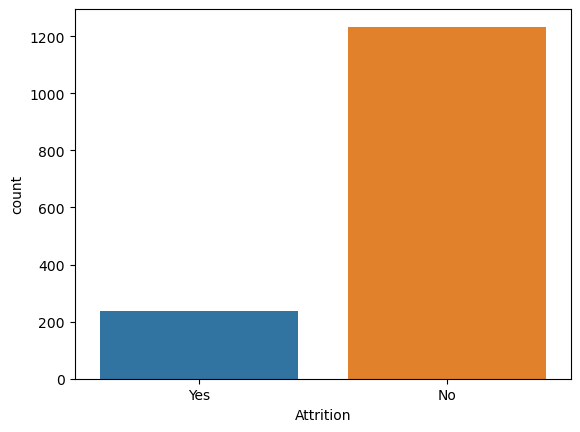

In [62]:
# Attrition vs Count  using countplot.
sns.countplot(x= 'Attrition', data= attrition_filtered_df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

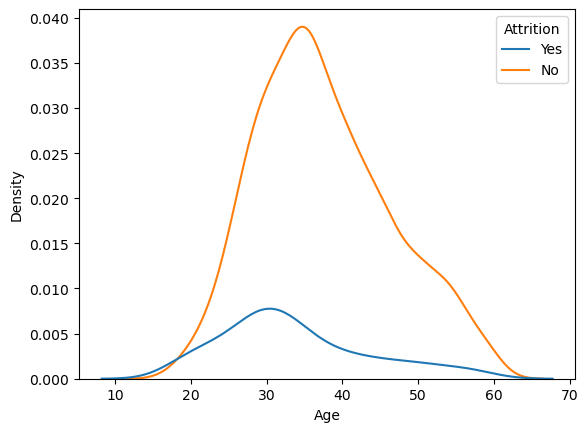

In [63]:
# Do Age plays major role in Attrition ? 
sns.kdeplot(data=attrition_filtered_df , x= 'Age', hue='Attrition')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

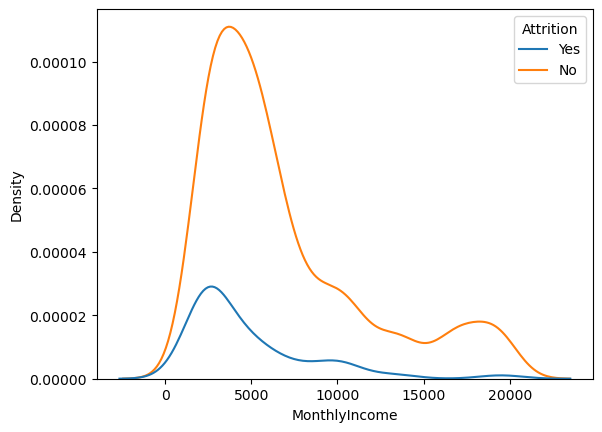

In [65]:
# Monthly Income vs Attrition density.
sns.kdeplot(data=attrition_filtered_df , x= 'MonthlyIncome', hue='Attrition')

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

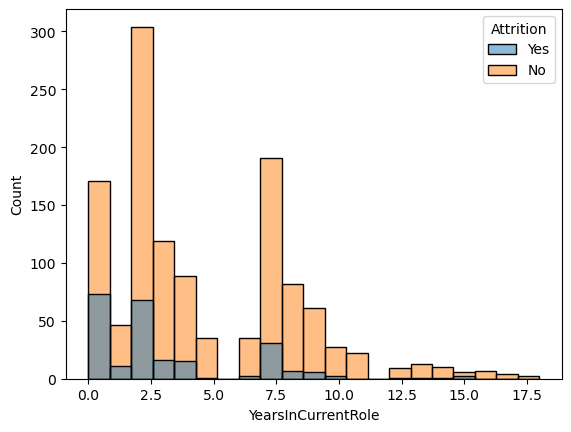

In [71]:
# Does experience helps people say longer in the company ?
sns.histplot(data= attrition_filtered_df, x='YearsInCurrentRole', hue='Attrition')


<AxesSubplot:xlabel='Gender', ylabel='Count'>

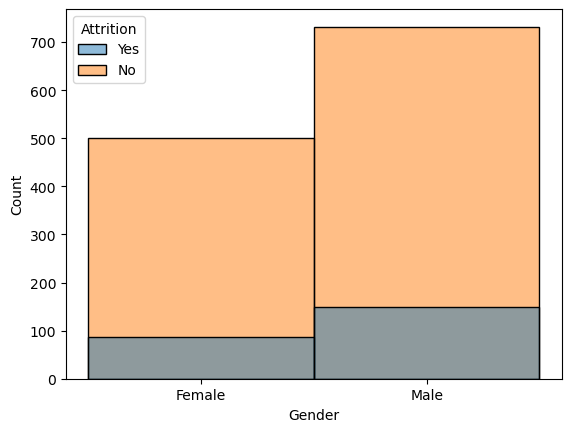

In [77]:
# Gender vs Attrition count
sns.histplot(data= attrition_filtered_df , x= 'Gender', hue='Attrition')


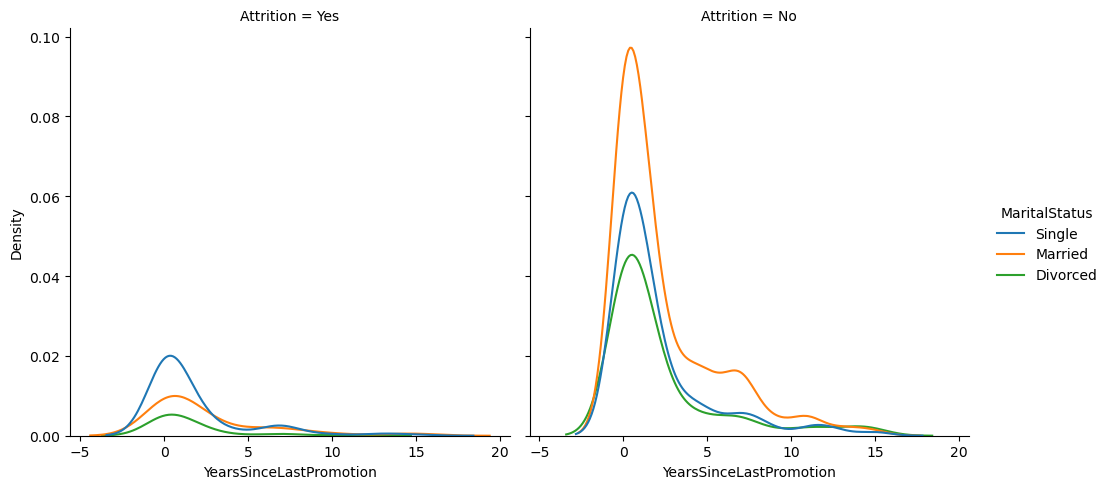

In [103]:
# Considering the Marital Status and Years since LastPromotion has any lead for employer leaving the company ?

#sns.displot(data= attrition_filtered_df, x= 'YearsSinceLastPromotion', hue='Attrition', col= 'Gender', kind='kde')
sns.displot(data= attrition_filtered_df, x= 'YearsSinceLastPromotion', hue='MaritalStatus', col= 'Attrition', kind='kde')


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

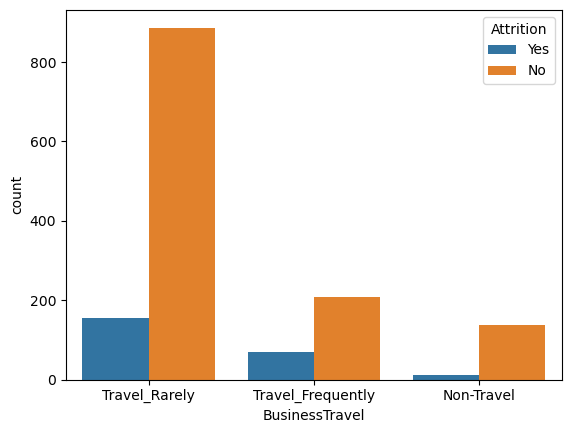

In [100]:
# Does Bussiness Travel has an impact Attrition ? 
sns.countplot(data= attrition_filtered_df, x='BusinessTravel', hue='Attrition')

In [59]:
# Finding columns with non-numerical values.
attrition_filtered_df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No
